## Import Important Packages

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as stats


In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#reading data
df = pd.read_excel('final project data 3-1.xlsx')

In [4]:
df.shape

(99999, 9)

In [5]:
df.head()

,Configuration,Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),Integrated Wireless?,HD Size (GB),Bundled Applications?
0,163,1455,15,5,4,2.0,Yes,80,Yes
1,320,1545,15,6,4,2.0,No,300,No
2,23,1515,15,4,4,2.0,Yes,300,Yes
3,169,1395,15,5,4,2.0,No,40,Yes
4,365,1585,15,6,8,2.0,No,120,Yes


In [7]:
df.describe()

,Configuration,Price,Screen Size (Inches),Battery Life (Hours),RAM (GB),Processor Speeds (GHz),HD Size (GB)
count,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,328.490615,1481.551246,15.569966,5.022310,7.738157,1.879778,137.455375
std,219.346758,137.789266,0.902817,0.815111,4.120614,0.340255,99.528363
min,1.000000,1000.000000,15.000000,4.000000,4.000000,1.500000,40.000000
25%,163.000000,1435.000000,15.000000,4.000000,4.000000,1.500000,80.000000
50%,304.000000,1490.000000,15.000000,5.000000,8.000000,2.000000,120.000000
75%,470.000000,1555.000000,17.000000,6.000000,8.000000,2.000000,300.000000
max,864.000000,1890.000000,17.000000,6.000000,16.000000,2.400000,300.000000


## Exploratory Analysis

In [119]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Configuration           99999 non-null  int64  
 1   Price                   99999 non-null  int64  
 2   Screen Size (Inches)    99999 non-null  int64  
 3   Battery Life (Hours)    99999 non-null  int64  
 4   RAM (GB)                99999 non-null  int64  
 5   Processor Speeds (GHz)  99999 non-null  float64
 6   Integrated Wireless?    99999 non-null  object 
 7   HD Size (GB)            99999 non-null  int64  
 8   Bundled Applications?   99999 non-null  object 
dtypes: float64(1), int64(6), object(2)
memory usage: 6.9+ MB


In [120]:
# check the null values in the dataset
df.isnull().sum()

Configuration             0
Price                     0
Screen Size (Inches)      0
Battery Life (Hours)      0
RAM (GB)                  0
Processor Speeds (GHz)    0
Integrated Wireless?      0
HD Size (GB)              0
Bundled Applications?     0
dtype: int64

<AxesSubplot: xlabel='Price', ylabel='Density'>

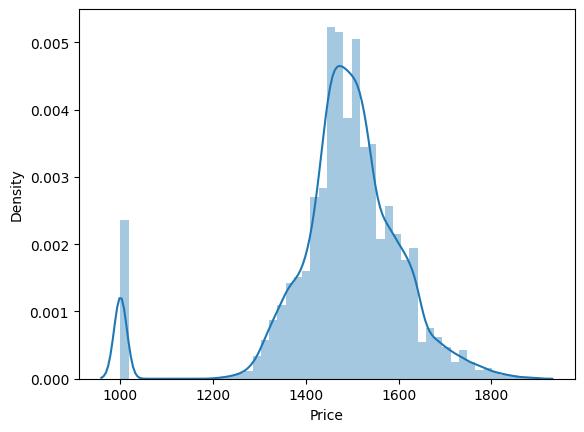

In [121]:
sns.distplot(df['Price'])


<AxesSubplot: xlabel='Processor Speeds (GHz)', ylabel='Density'>

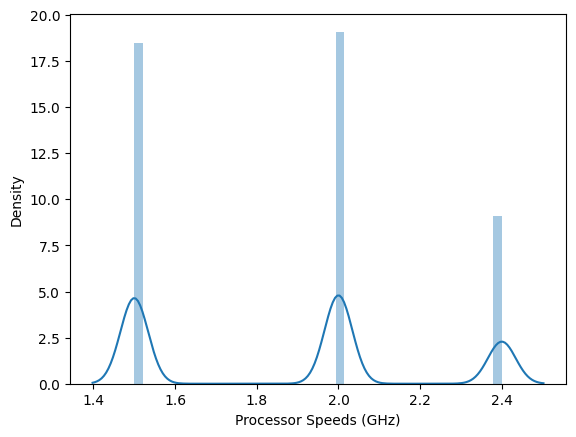

In [8]:
sns.distplot(df['Processor Speeds (GHz)'])


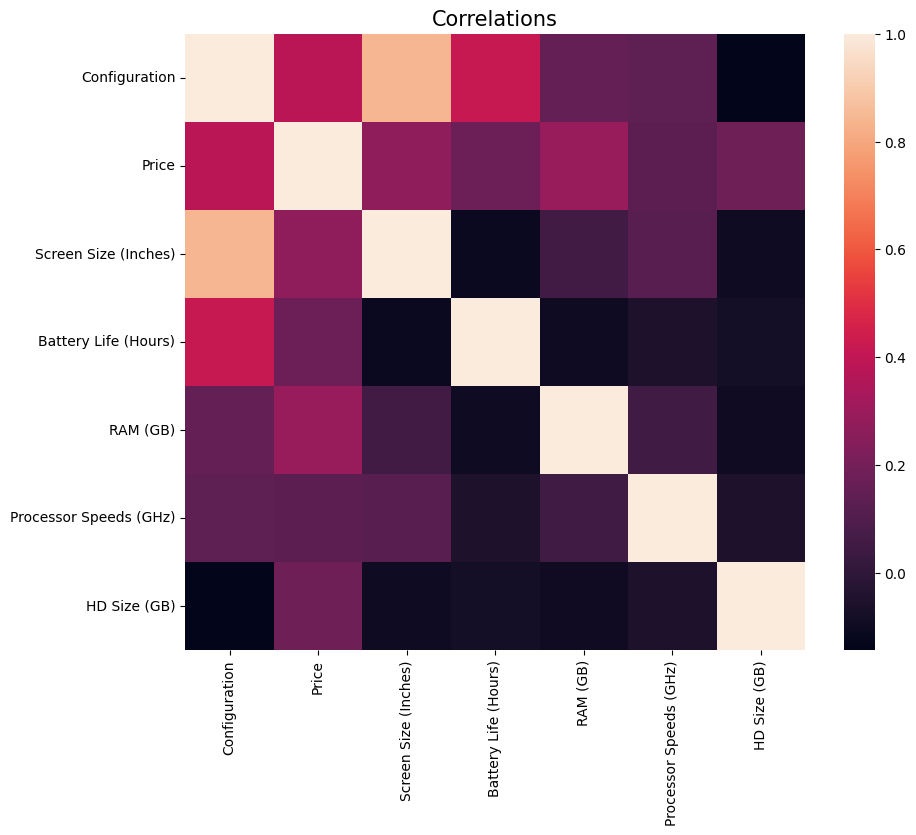

In [122]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr())
plt.title("Correlations", size=15)
plt.show()

<AxesSubplot: xlabel='Processor Speeds (GHz)', ylabel='Price'>

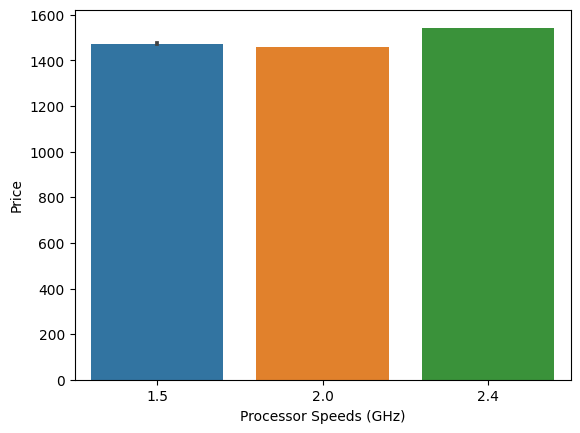

In [123]:
sns.barplot(x = df["Processor Speeds (GHz)"],y = df["Price"])


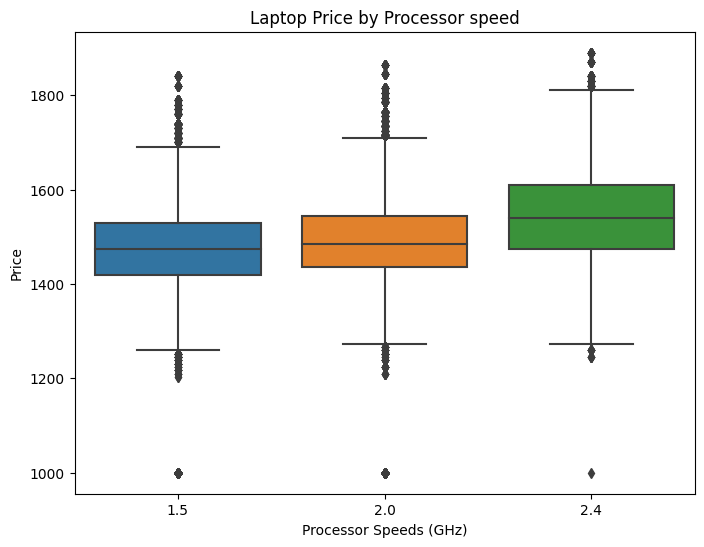

In [124]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Processor Speeds (GHz)', y='Price', data=df)
title = plt.title('Laptop Price by Processor speed')


<AxesSubplot: xlabel='RAM (GB)', ylabel='Price'>

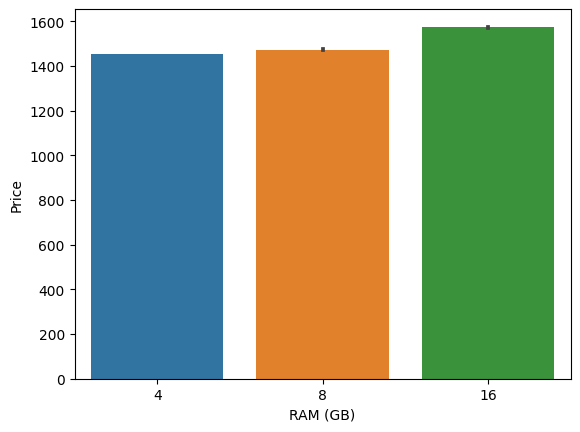

In [125]:
sns.barplot(x = df["RAM (GB)"],y = df["Price"])


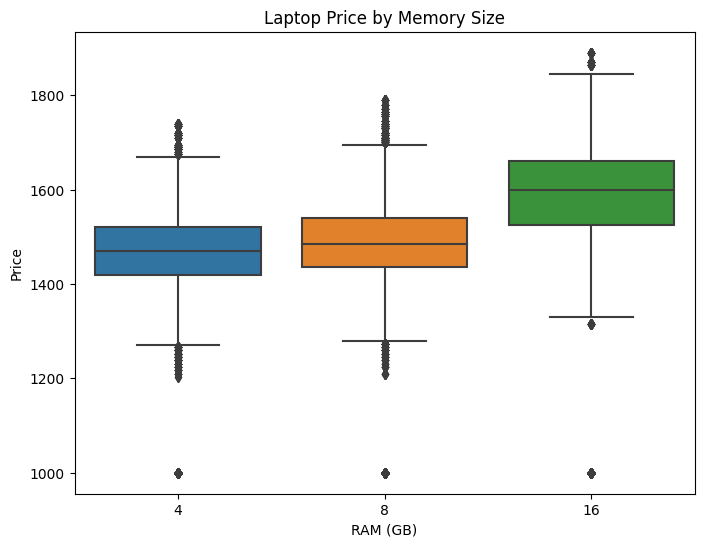

In [126]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='RAM (GB)', y='Price', data=df)
title = plt.title('Laptop Price by Memory Size')

<AxesSubplot: xlabel='Screen Size (Inches)', ylabel='Price'>

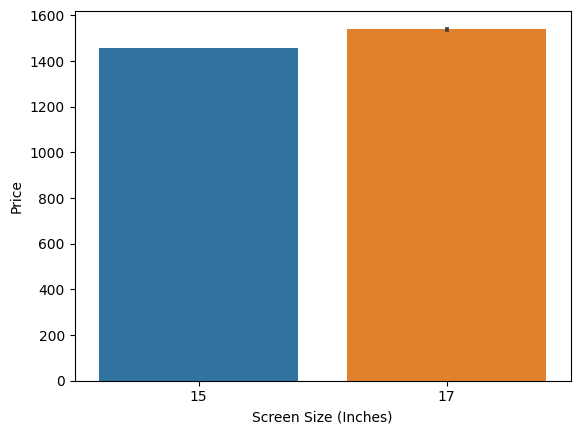

In [128]:
sns.barplot(x = df["Screen Size (Inches)"],y = df["Price"])


<AxesSubplot: xlabel='Battery Life (Hours)', ylabel='Price'>

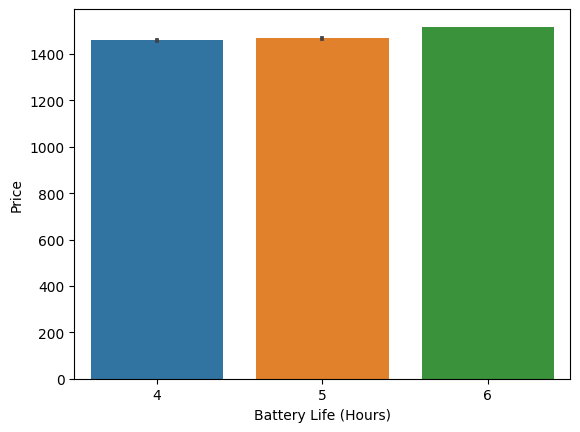

In [129]:
sns.barplot(x = df["Battery Life (Hours)"],y = df["Price"])


<AxesSubplot: xlabel='Integrated Wireless?', ylabel='Price'>

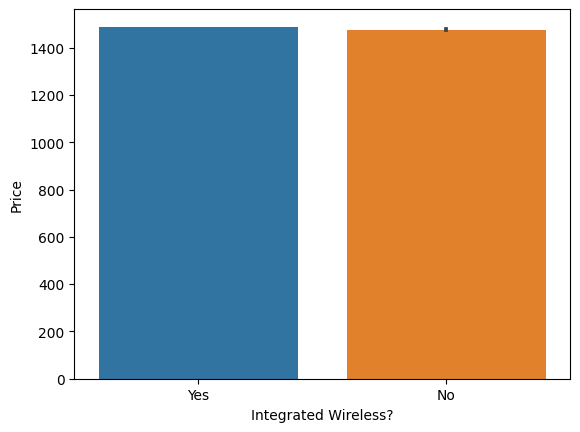

In [130]:
sns.barplot(x = df["Integrated Wireless?"],y = df["Price"])


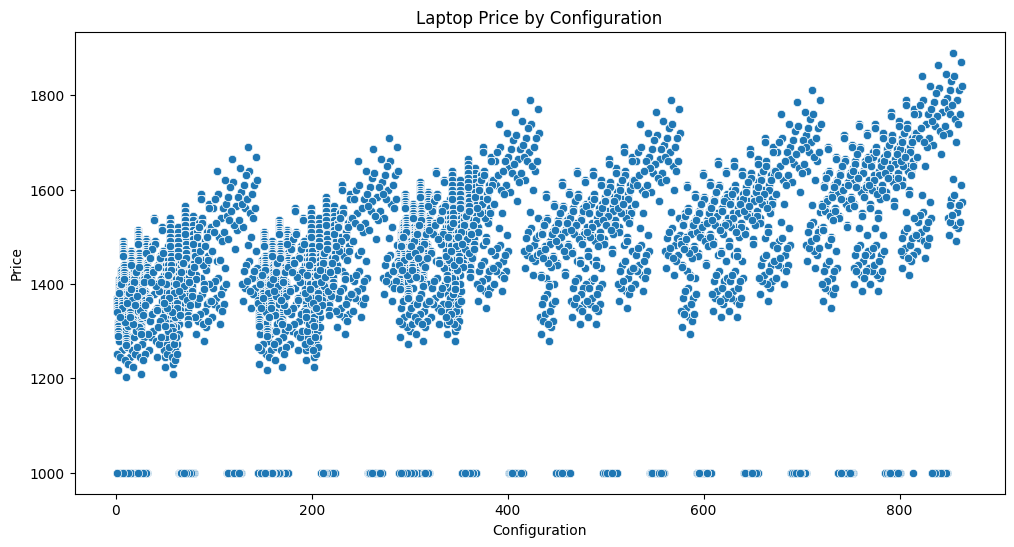

In [131]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Configuration', y='Price', data=df)
title = plt.title('Laptop Price by Configuration')


In [132]:
# renaming to use these variables with the stat anova analysis model below
df.rename(columns={'RAM (GB)': 'RAM_GB',
                   'Processor Speeds (GHz)': 'ProcessorSpeeds_GHz'
                  ,'Bundled Applications?': 'BundledApplications'
                  ,'Integrated Wireless?': 'IntegratedWireless'
                  ,'Battery Life (Hours)': 'BatteryLife_Hours'},
          inplace=True, errors='raise')


## Anova Analysis

H0 = The mean Laptop Price  is equal for Processor Speeds Category.

H1 = At least one of the Processor Speeds category has a mean price that is not the same as the other Processor Speeds Category

In [133]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

hypothesis1 = ols('Price ~ ProcessorSpeeds_GHz',
            data = df).fit()
                
hypothesis1_result = sm.stats.anova_lm(hypothesis1, typ=2)
print (hypothesis1_result)

                           sum_sq       df            F  PR(>F)
ProcessorSpeeds_GHz  3.255758e+07      1.0  1744.733473     0.0
Residual             1.865993e+09  99997.0          NaN     NaN


the p-value of the condition variable is < 0.05

which implies that Processor Speeds gives impact on the Laptop Price. 

So the H0 is rejected.

H0 = The mean Laptop Price  is equal for Integrated Wireless Category.

H1 = At least one of the Integrated Wireless variable has a mean price that is not the same as the other Integrated Wireless variable Category

In [134]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

hypothesis2 = ols('Price ~ IntegratedWireless',
            data = df).fit()
                
hypothesis2_result = sm.stats.anova_lm(hypothesis2, typ=2)
print (hypothesis2_result)

                          sum_sq       df           F        PR(>F)
IntegratedWireless  3.132125e+06      1.0  165.242204  8.677070e-38
Residual            1.895418e+09  99997.0         NaN           NaN


the p-value of the condition variable is < 0.05

which implies that Integrated Wireless gives impact on the Laptop Price.

So the H0 is rejected.

In [135]:
df.head()

,Configuration,Price,Screen Size (Inches),BatteryLife_Hours,RAM_GB,ProcessorSpeeds_GHz,IntegratedWireless,HD Size (GB),BundledApplications
0,163,1455,15,5,4,2.0,Yes,80,Yes
1,320,1545,15,6,4,2.0,No,300,No
2,23,1515,15,4,4,2.0,Yes,300,Yes
3,169,1395,15,5,4,2.0,No,40,Yes
4,365,1585,15,6,8,2.0,No,120,Yes


## Data Preprocessing

In [136]:
#drop target
X = df.drop("Price", axis=1)


In [137]:
y = df["Price"]

### Encoding Categorical Features

In [138]:
# select categories columns
categorical=list(X.select_dtypes(include=['category','object']).columns)

# select numerical columns

numerical=list(X.select_dtypes(exclude=['category','object']).columns)


In [139]:
categorical

['IntegratedWireless', 'BundledApplications']

In [140]:
numerical

['Configuration',
 'Screen Size (Inches)',
 'BatteryLife_Hours',
 'RAM_GB',
 'ProcessorSpeeds_GHz',
 'HD Size (GB)']

In [141]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'Categorical' columns
encoder_df = pd.DataFrame(encoder.fit_transform(df[['IntegratedWireless', 'BundledApplications']]).toarray())

#merge one-hot encoded columns back with original DataFrame
X = X.join(encoder_df)



In [142]:
# drop the old categorical features
X = X.drop(categorical, axis=1)

In [143]:
X.head()

,Configuration,Screen Size (Inches),BatteryLife_Hours,RAM_GB,ProcessorSpeeds_GHz,HD Size (GB),0,1,2,3
0,163,15,5,4,2.0,80,0.0,1.0,0.0,1.0
1,320,15,6,4,2.0,300,1.0,0.0,1.0,0.0
2,23,15,4,4,2.0,300,0.0,1.0,0.0,1.0
3,169,15,5,4,2.0,40,1.0,0.0,0.0,1.0
4,365,15,6,8,2.0,120,1.0,0.0,0.0,1.0


### numerical Features standardization

In [144]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X[numerical] = scaler.fit_transform(X[numerical])

In [145]:
X.head()

,Configuration,Screen Size (Inches),BatteryLife_Hours,RAM_GB,ProcessorSpeeds_GHz,HD Size (GB),0,1,2,3
0,0.187717,0.0,0.5,0.000000,0.555556,0.153846,0.0,1.0,0.0,1.0
1,0.369641,0.0,1.0,0.000000,0.555556,1.000000,1.0,0.0,1.0,0.0
2,0.025492,0.0,0.0,0.000000,0.555556,1.000000,0.0,1.0,0.0,1.0
3,0.194670,0.0,0.5,0.000000,0.555556,0.000000,1.0,0.0,0.0,1.0
4,0.421784,0.0,1.0,0.333333,0.555556,0.307692,1.0,0.0,0.0,1.0


In [146]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.linear_model import LinearRegression

In [147]:
from sklearn.model_selection import train_test_split, cross_val_score


In [148]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### Linear Regression

In [149]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [150]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [152]:
print("MAE:", mae)
print("RMSE:", rmse)


MAE: 61.18365625
RMSE: 113.61534916772428


### Logistic Regression

In [153]:
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=0).fit(X_train, y_train)
y_pred = LR.predict(X_test) 


In [154]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))


In [155]:
print("MAE:", mae)
print("RMSE:", rmse)


MAE: 180.0909
RMSE: 290.823713613591
